In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm

# Load the dataset
file_path = '/content/sample-superstore-subset-excel.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows and summary statistics
print(df.head())
print(df.describe())

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

    Region State or Province       City  Postal Code Order Date  Ship Date  \
0  Centr

In [ ]:
# Handle missing values
df = df.dropna()

# Convert data types if necessary
df.loc[:, 'Order Date'] = pd.to_datetime(df['Order Date'])
df.loc[:, 'Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create any new columns needed for analysis
df['Order Month'] = df['Order Date'].dt.to_period('M')

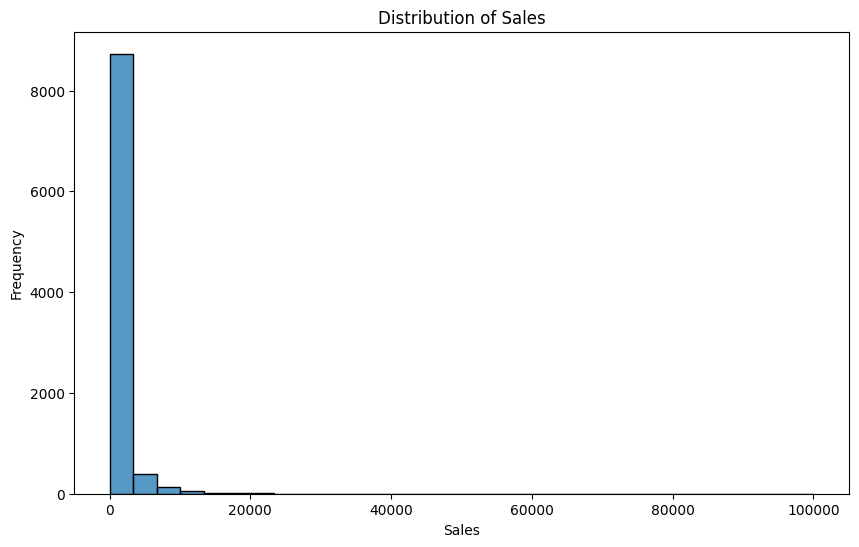

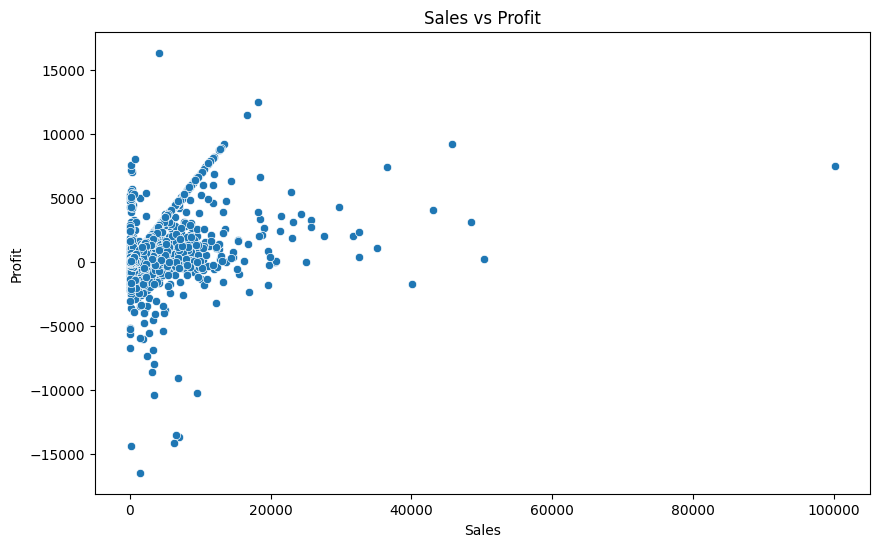

In [ ]:
# Univariate analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Bivariate analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Summary statistics for key variables
print(df[['Sales', 'Profit', 'Quantity ordered new']].describe())

# Grouped statistics
grouped = df.groupby('Region')[['Sales', 'Profit']].sum()
print(grouped)

               Sales        Profit  Quantity ordered new
count    9354.000000   9354.000000           9354.000000
mean      939.657616    136.892329             13.790464
std      2596.185822    991.928171             15.107085
min         1.320000 -16476.838000              1.000000
25%        60.492500    -73.959375              5.000000
50%       200.290000      2.477000             10.000000
75%       764.652500    138.343500             17.000000
max    100119.160000  16332.414000            170.000000
              Sales         Profit
Region                            
Central  2493762.80  511534.461467
East     2366343.86  369034.948607
South    1568582.35  100322.369320
West     2360868.33  299599.064657



### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [ ]:
# Example: T-test for sales in different regions
region1_sales = df[df['Region'] == 'Region 1']['Sales']
region2_sales = df[df['Region'] == 'Region 2']['Sales']
t_stat, p_val = ttest_ind(region1_sales, region2_sales)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

# Example: Chi-square test for independence between Ship Mode and Customer Segment
contingency_table = pd.crosstab(df['Ship Mode'], df['Customer Segment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test: chi2 = {chi2}, p-value = {p}")

T-test: t-statistic = nan, p-value = nan
Chi-square test: chi2 = 1.1506462403472757, p-value = 0.9792522476281447


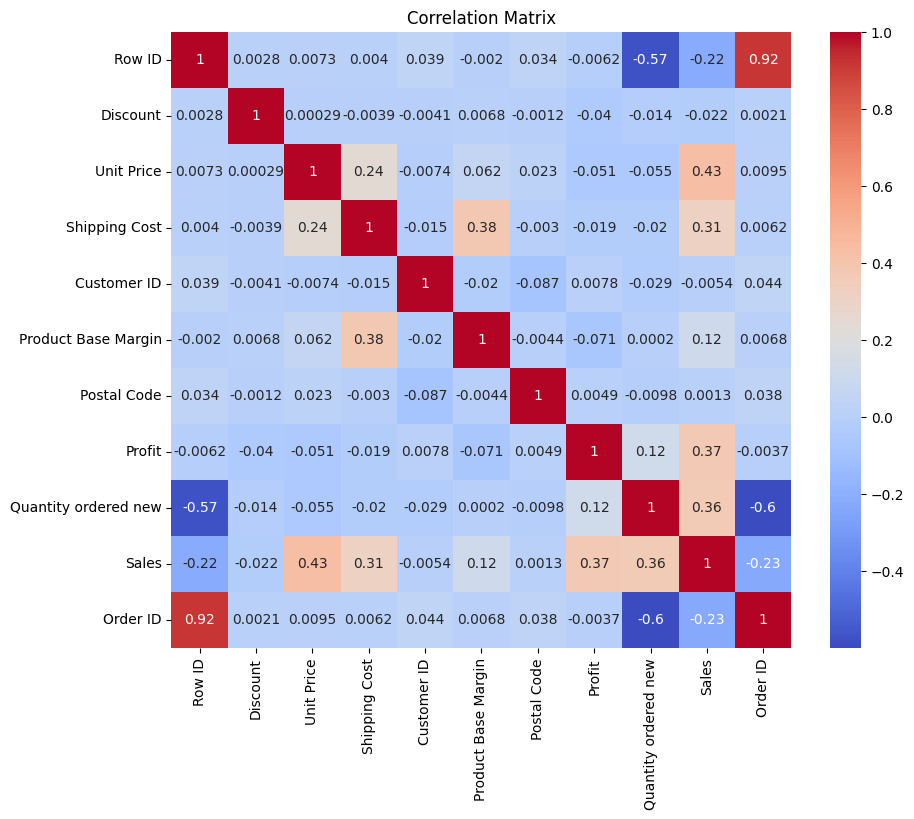

In [ ]:
# Selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Example: Linear regression analysis for Sales prediction
X = df[['Profit', 'Quantity ordered new', 'Discount']]
y = df['Sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     963.8
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:12:15   Log-Likelihood:                -85551.
No. Observations:                9354   AIC:                         1.711e+05
Df Residuals:                    9350   BIC:                         1.711e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   89.7502 

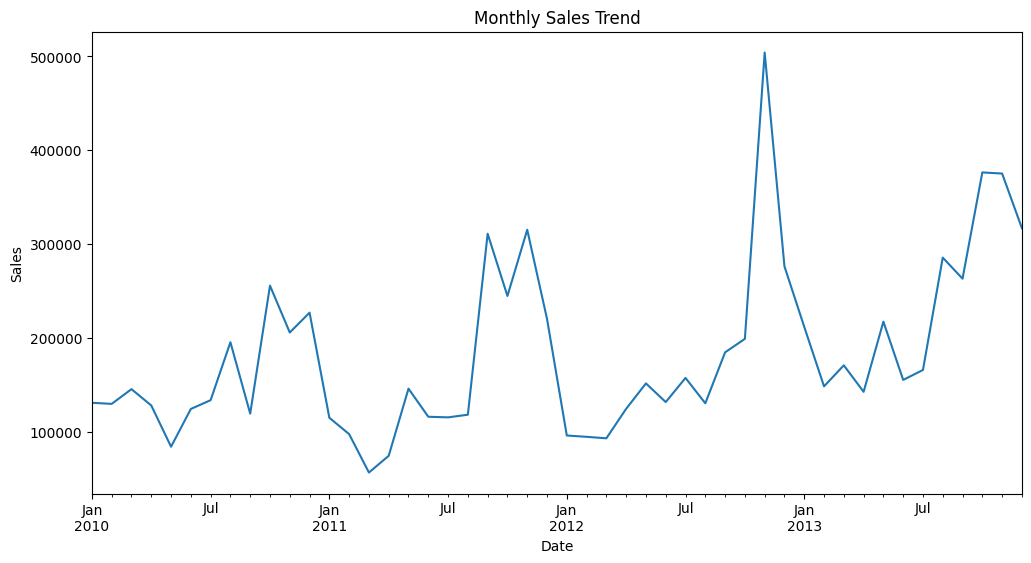

In [ ]:
# Plotting sales trends over time
df.set_index('Order Date', inplace=True)
sales_trend = df['Sales'].resample('M').sum()
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

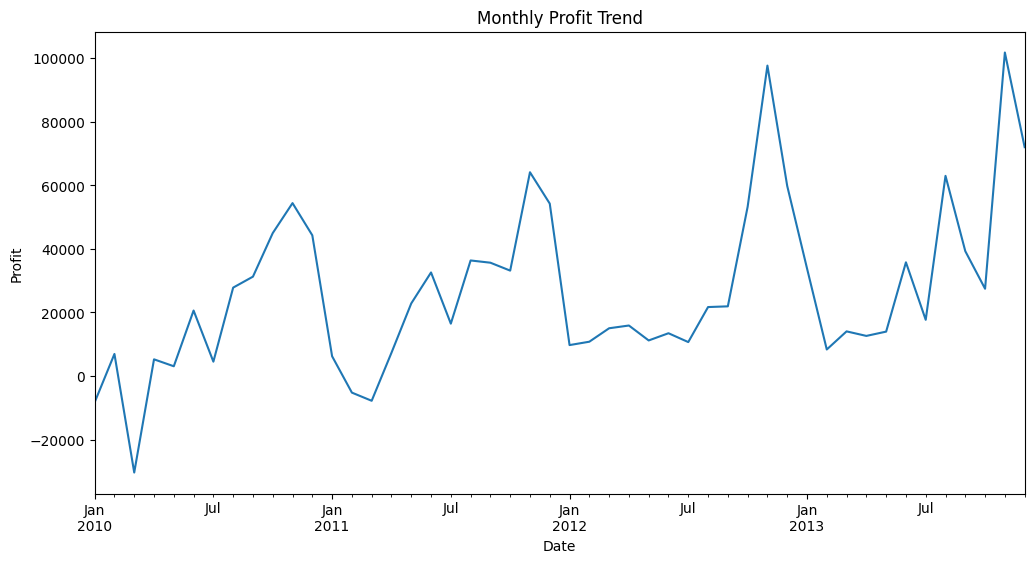

In [ ]:
# Plotting profit trends over time
profit_trend = df['Profit'].resample('M').sum()
plt.figure(figsize=(12, 6))
profit_trend.plot()
plt.title('Monthly Profit Trend')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

                       Sales         Profit
Product Category                           
Technology        3514982.03  683097.884748
Furniture         3038510.90  140343.135390
Office Supplies   2236064.41  457049.823912


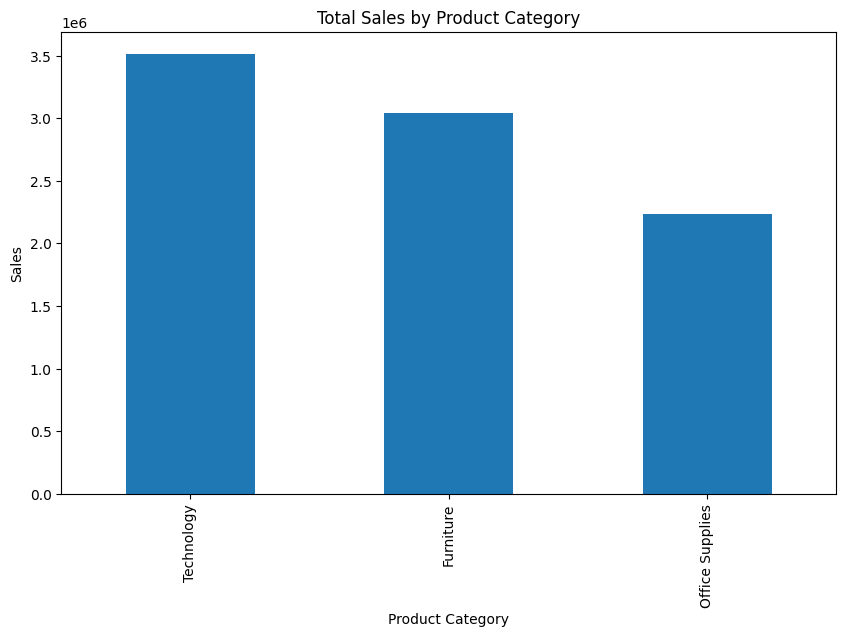

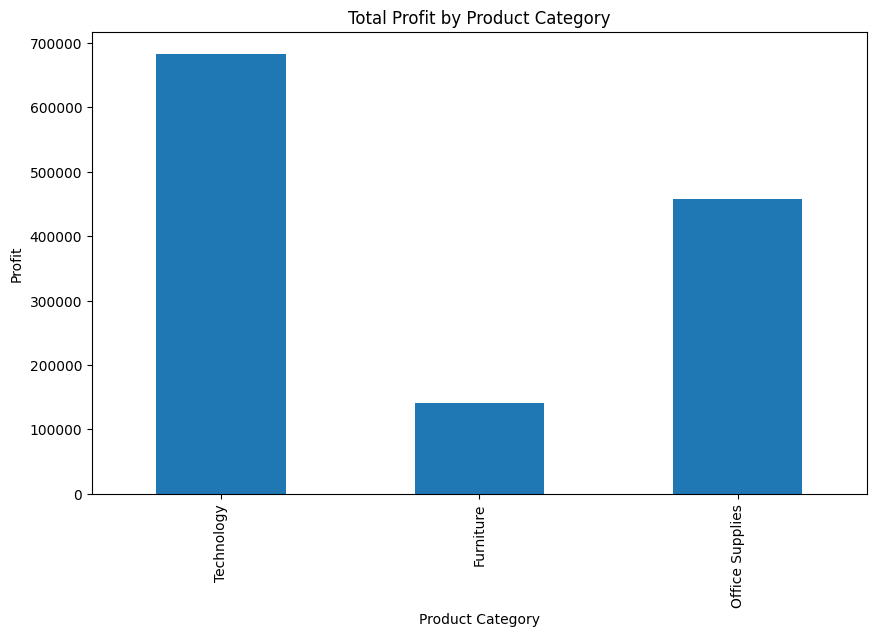

In [ ]:
# Identifying top-performing product categories based on total sales and profit
top_categories = df.groupby('Product Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(top_categories)

# Plotting total sales by product category
plt.figure(figsize=(10, 6))
top_categories['Sales'].plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

# Plotting total profit by product category
plt.figure(figsize=(10, 6))
top_categories['Profit'].plot(kind='bar')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Generating summary statistics for each region
region_summary = df.groupby('Region').describe()
print(region_summary)

# Display summary statistics
print(df.describe())

         Row ID                                                             \
          count          mean    min       25%      50%       75%      max   
Region                                                                       
Central  2878.0  21014.190063   52.0  19696.25  21827.5  24176.75  26387.0   
East     2269.0  19126.691935    2.0  18720.00  21421.0  23776.00  26389.0   
South    1940.0  21167.875258  257.0  19766.75  21985.0  24336.00  26399.0   
West     2267.0  19597.648875   64.0  18975.50  21344.0  23895.50  26397.0   

                     Discount            ...      Sales              Order ID  \
                 std    count      mean  ...        max          std    count   
Region                                   ...                                    
Central  5030.122461   2878.0  0.049312  ...   32589.59  2035.630454   2878.0   
East     7184.371986   2269.0  0.049903  ...   48418.58  2793.734542   2269.0   
South    4962.680136   1940.0  0.049294  ...   4

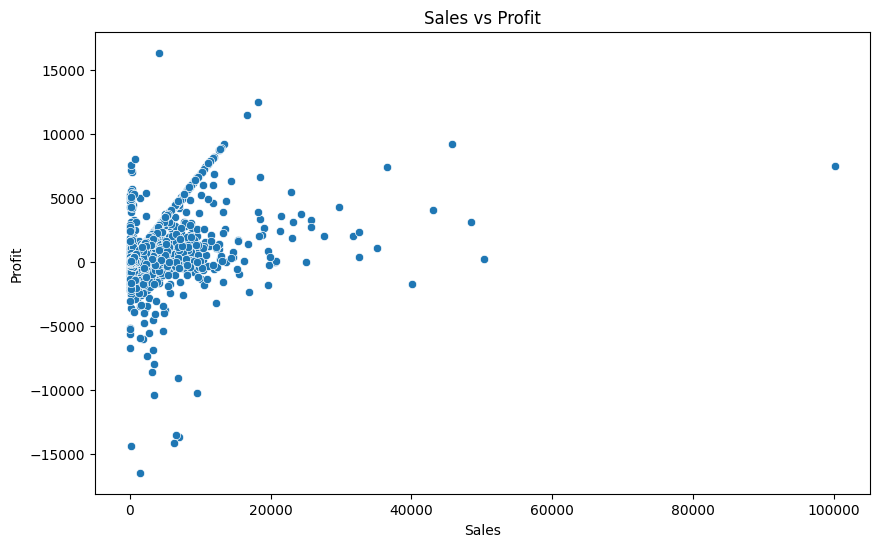

Correlation coefficient between Sales and Profit: 0.37104419553361767


In [ ]:
# Visualizing the correlation between sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Displaying the correlation coefficient
correlation = df['Sales'].corr(df['Profit'])
print(f"Correlation coefficient between Sales and Profit: {correlation}")

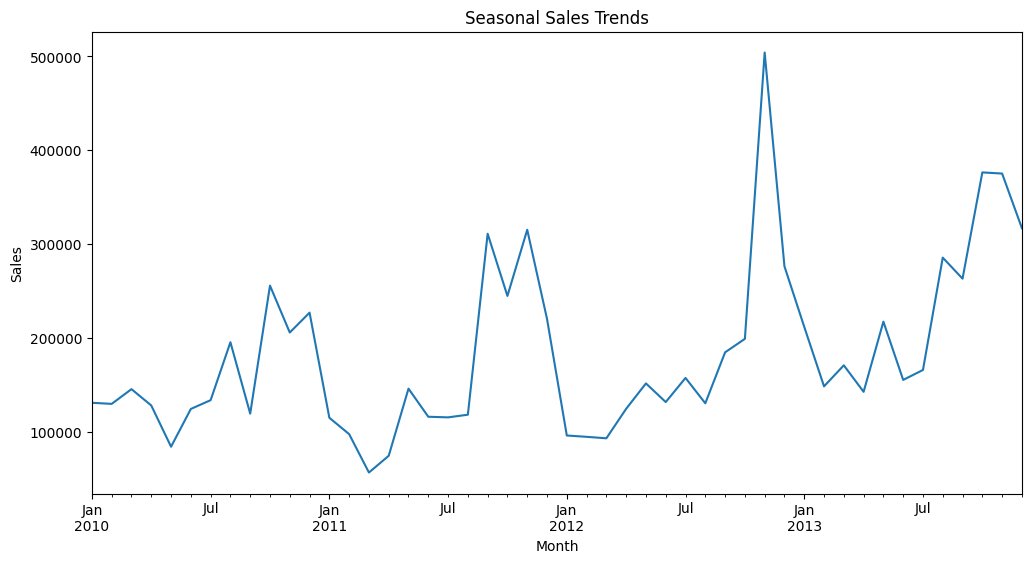

            Row ID Order Priority  Discount  Unit Price  Shipping Cost  \
Order Date                                                               
2012-05-28   18606  Not Specified      0.01        2.88           0.50   
2010-07-07   20847           High      0.01        2.84           0.93   
2011-07-27   23086  Not Specified      0.03        6.68           6.15   
2011-07-27   23087  Not Specified      0.01        5.68           3.60   
2011-07-27   23088  Not Specified      0.00      205.99           2.50   

            Customer ID    Customer Name    Ship Mode Customer Segment  \
Order Date                                                               
2012-05-28            2  Janice Fletcher  Regular Air        Corporate   
2010-07-07            3    Bonnie Potter  Express Air        Corporate   
2011-07-27            3    Bonnie Potter  Express Air        Corporate   
2011-07-27            3    Bonnie Potter  Regular Air        Corporate   
2011-07-27            3    Bonnie Pot

In [ ]:
# Analyzing seasonal sales trends
seasonal_sales = df.groupby(df.index.to_period('M'))['Sales'].sum()
plt.figure(figsize=(12, 6))
seasonal_sales.plot()
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Display the first few rows and summary statistics
print(df.head())
print(df.describe())

# Handle missing values
df_cleaned = df.dropna() # Create a copy to avoid modifying the original DataFrame

# Check if 'Order Date' column exists in df_cleaned
if 'Order Date' in df_cleaned.columns:
    # Convert data types if necessary
    df_cleaned.loc[:, 'Order Date'] = pd.to_datetime(df_cleaned['Order Date']) # Use the cleaned DataFrame
    df_cleaned.loc[:, 'Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'])

    # Create any new columns needed for analysis
    df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.to_period('M')

    # Grouping sales data by month and year
    df_cleaned['Year'] = df_cleaned['Order Date'].dt.year
    df_cleaned['Month'] = df_cleaned['Order Date'].dt.month

    # Aggregate sales data by month and year
    monthly_sales = df_cleaned.groupby(['Year', 'Month'])['Sales'].sum().reset_index() # Use the cleaned DataFrame
    monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

    # Plotting seasonal sales trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_sales, x='Date', y='Sales')
    plt.title('Seasonal Sales Trends')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
else:
    print("Error: 'Order Date' column not found in df_cleaned. Check your data cleaning steps.")

In [ ]:
# Comparing sales across different ship modes
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum()
print(sales_by_ship_mode)

Ship Mode
Delivery Truck    3650525.84
Express Air        674603.99
Regular Air       4464427.51
Name: Sales, dtype: float64


Index(['Row_ID', 'Order_Priority', 'Discount', 'Unit_Price', 'Shipping_Cost',
       'Customer_ID', 'Customer_Name', 'Ship_Mode', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Container',
       'Product_Name', 'Product_Base_Margin', 'Region', 'State_or_Province',
       'City', 'Postal_Code', 'Order_Date', 'Ship_Date', 'Profit',
       'Quantity_ordered_new', 'Sales', 'Order_ID'],
      dtype='object')


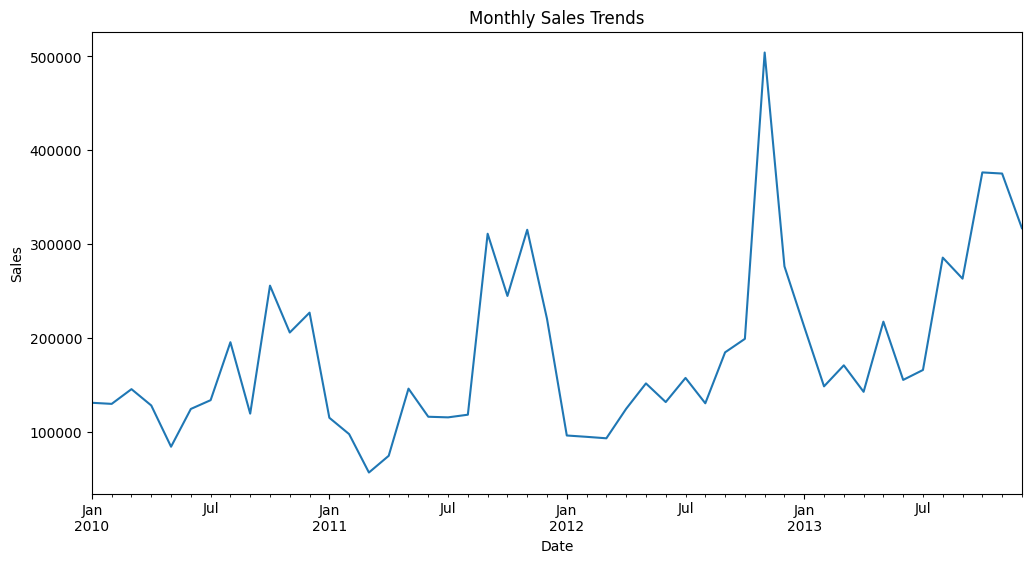

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
%matplotlib inline

# Load the dataset
file_path = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(file_path)

# Handle missing values
df = df.dropna()

# Ensure column names are clean
df.columns = df.columns.str.replace(' ', '_')

# Print column names to verify
print(df.columns)

# Convert data types if necessary
df.loc[:, 'Order_Date'] = pd.to_datetime(df['Order_Date'])
df.loc[:, 'Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

# Dropping rows where 'Ship_Date' couldn't be converted
df = df.dropna(subset=['Ship_Date'])

# Create any new columns needed for analysis
df['Order_Month'] = df['Order_Date'].dt.to_period('M')

# Grouping sales data by month and year
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

# Aggregate sales data by month and year
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Ensure 'Ship_Date' column is datetime type
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

# Dropping rows where 'Ship_Date' couldn't be converted
df = df.dropna(subset=['Ship_Date'])

# Set 'Order_Date' as the index for resampling
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df.set_index('Order_Date', inplace=True)

# Resample sales data by month
monthly_sales = df['Sales'].resample('M').sum()

# Plotting monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()